<a href="https://colab.research.google.com/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/LOD_SPARQL/01_bnb_lod_Compare_Resources_by_two_subjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BNB -- SPARQL query - Compare resources by two Subjects

The [BNB Linked Data Platform](https://bnb.data.bl.uk/) provides access to the [British National Bibliography (BNB)](http://www.bl.uk/bibliographic/natbib.html) published as linked open data and made available through SPARQL services. 

This notebook explains how to query it to retrieve records of resources indexed under two given Subjects / Topics (LCSH), and compares them regarding their publication date.

## Define the Subjects to Compare

Set the Subject to search from [LCSH list](http://id.loc.gov/authorities/subjects.html):

In [0]:
# Examples -- uncomment the desired subject, or added your own set of Subject and Label, and do "Run" or "Runtime" > "Run all" or "Run all cells":

Label = ''

# Subject = 'Nanotubes'
# Label = 'Nanotubes'

Subject1 = 'Climaticchanges'
Label1 = 'Climatic Changes'

Subject2 = 'Globalwarming'
Label2 = 'Global Warming'

#### Required modules / libraries

In [0]:
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas import json_normalize

## Let's query the repository by asking the publications indexed by the defined Subjects
We will use the [SPARQL endpoint](https://bnb.data.bl.uk/flint-sparql) to create the query and configure the request to retrieve json as a result.

In [31]:
url = 'https://bnb.data.bl.uk/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/> 
PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX schema: <http://schema.org/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT ?resource ?isbn ?title ?date ?author ?authorUri WHERE {{
      ?resource dct:subject <http://bnb.data.bl.uk/id/concept/lcsh/{0}>;  
            dct:title ?title ; 
            schema:author ?authorUri ; 
            schema:datePublished ?date . 
      ?authorUri rdfs:label ?author .
}}  
"""

# Query for Subject 1
query1 = query.format(Subject1)

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query1}, headers=headers)
print('Records retrieved for subject ' + Label1)


Records retrieved for subject Climatic Changes


In [0]:
# print(r.text)

## Load the data into DataFrames

In [33]:
bnbdata = json.loads(r.text)
dfSub1 = json_normalize(bnbdata['results']['bindings']) 
dfSub1.head(2)

,resource.type,resource.value,title.type,title.value,date.type,date.value,author.type,author.value,authorUri.type,authorUri.value
0,uri,http://bnb.data.bl.uk/id/resource/019483741,literal,Dwelling in the age of climate change : the et...,literal,2019-08,literal,"Kelly, Elaine",uri,http://bnb.data.bl.uk/id/person/KellyElaine
1,uri,http://bnb.data.bl.uk/id/resource/019483741,literal,Dwelling in the age of climate change : the et...,literal,2019-08,literal,"Kelly, Elaine",uri,http://bnb.data.bl.uk/id/person/KellyElaine


In [34]:
# Query for Subject 2
query2 = query.format(Subject2)

r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query2}, headers=headers)
print('Elements retrieved for subject ' + Label2)

bnbdata = json.loads(r.text)
dfSub2 = json_normalize(bnbdata['results']['bindings']) 
dfSub2.head(2)

Elements retrieved for subject Global Warming


,resource.type,resource.value,title.type,title.value,date.type,date.value,author.type,author.value,authorUri.type,authorUri.value
0,uri,http://bnb.data.bl.uk/id/resource/018543304,literal,Global climate change : turning knowledge into...,literal,2017-09,literal,"Kitchen, David, 1956-",uri,http://bnb.data.bl.uk/id/person/KitchenDavid1956-
1,uri,http://bnb.data.bl.uk/id/resource/018543304,literal,Global climate change : turning knowledge into...,literal,2017-09,literal,"Kitchen, David, 1956-",uri,http://bnb.data.bl.uk/id/person/KitchenDavid1956-


## How many items?

In [35]:
# How many items for each Subject?
print('Number of records retrieved for subject ' + Label1 + ': ' + str(len(dfSub1)))
print('Number of records retrieved for subject ' + Label2 + ': ' + str(len(dfSub2)))


Number of records retrieved for subject Climatic Changes: 1211
Number of records retrieved for subject Global Warming: 455


### Let's count the number of Resources by author

In [36]:
#Subject 1
resources_by_author_Sub1 = dfSub1['author.value'].value_counts()
print('Rank of Authors about ' + Label1)
resources_by_author_Sub1

Rank of Authors about Climatic Changes


Dessler, Andrew Emory                     12
Gribbin, John, 1946-                      12
Houghton, J. T. (John Theodore), 1931-    12
Bonan, Gordon B.                          10
Gines, Julie K.                           10
                                          ..
Bergkamp, Gerardus Johannus Jacobus        1
Armstrong, Eileen, B.A.                    1
Gill, E. J.                                1
Tielidze, Levan                            1
Labohm, Hans H. J.                         1
Name: author.value, Length: 596, dtype: int64

In [37]:
#Subject 2
resources_by_author_Sub2 = dfSub2['author.value'].value_counts()
print('Rank of Authors about ' + Label2)
resources_by_author_Sub2

Rank of Authors about Global Warming


Houghton, J. T. (John Theodore), 1931-       18
Hansen, James E. (James Edward), 1941-       12
Johansen, Bruce E. (Bruce Elliott), 1950-    10
Booker, Christopher                           8
Lynas, Mark, 1973-                            8
                                             ..
Broecker, Wallace S., 1931-2019               1
Fay, Marianne                                 1
Worstall, Tim                                 1
Hughes, Patsy                                 1
Goldstein, Natalie                            1
Name: author.value, Length: 218, dtype: int64

### Create a chart to visualize the results
First let's see a top of publication Dates:

### Let's group the books by year

In [38]:
# First we create a new column in pandas with the year
dfSub1['year'] = pd.DatetimeIndex(dfSub1['date.value']).year
dfSub2['year'] = pd.DatetimeIndex(dfSub2['date.value']).year

# Check first five from Subject 1 books
dfSub1['year'].head(5)

0    2019
1    2019
2    2019
3    2019
4    2015
Name: year, dtype: int64

### Creating the chart of resources per year

In [41]:
# .sort_index() is very important = sorts by year, instead of the the regular count number

resources_by_year_Sub1 = dfSub1['year'].value_counts().sort_index()
resources_by_year_Sub2 = dfSub2['year'].value_counts().sort_index()

# let's check for Subject 1
resources_by_year_Sub1

1974    1
Name: year, dtype: int64

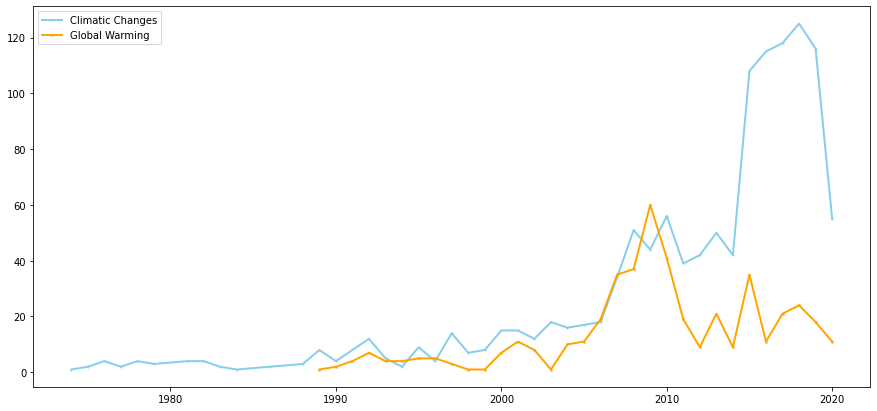

In [71]:
plt.figure(figsize=(15,7))
resources_by_year_Sub1.plot(marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=2, label=Label1)
resources_by_year_Sub2.plot(marker='x', color='orange', markersize=2, linewidth=2, label=Label2)
plt.legend()